In [106]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [99]:
data1 = pd.read_csv("ACME-HappinessSurvey2020.csv")
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [100]:
y = np.array(data["Y"])
y.shape

(126,)

In [101]:
x = np.array(data.drop(["Y"],axis = 1))
x.shape

(126, 6)

In [102]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 30)
predicted = KNeighborsClassifier()
predicted.fit(xtrain,ytrain)
succes =predicted.score(xtest,ytest)

print("percent accuracy is",succes*100,":")

percent accuracy is 63.1578947368421 :


***As we change the test size, its accuracy changes too.
The reaseon is in every time the model randomly select another piece of it.
this is why can't reach to wanted accuracy, to reach we can add more data.

***Also when we split you data into training and testing for machine learning models, 
this is done randomly to avoid potential selection biases arising. 
Whilst this is beneficial for obtaining non-biased resuts, 
it also means that results can differ from run to run

 ***For the furture selection, the filter methot is used. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.

 ***Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable. We will only select features which has correlation of above 0.2 (taking absolute value) with the output variable.

 ***The correlation coefficient has values between -1 to 1,
A value closer to 0 implies weaker correlation (exact 0 implying no correlation),
A value closer to 1 implies stronger positive correlation,
A value closer to -1 implies stronger negative correlation.

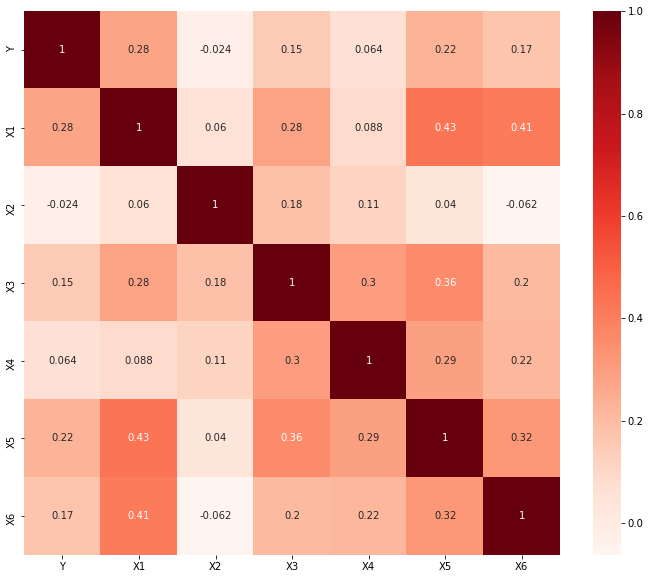

In [103]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [104]:
#Correlation with output variable
cor_target = abs(cor["Y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Y     1.000000
X1    0.280160
X5    0.224522
Name: Y, dtype: float64

***Only the features X1,X5 are highly correlated with the output variable.Hence we will drop all other features apart from these. However this is not the end of the process

In [105]:
print(data[["X1","X5"]].corr())

          X1        X5
X1  1.000000  0.432772
X5  0.432772  1.000000


As it seen above, the correlation between X1 and X5 is checked. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. However the corelation between them is not that high